# Assignment 2: s3944721 and s3941488

Authors: Issac Zerihun and Samuel Chan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')

In [3]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.set_index('date', inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, shuffle=False)

In [6]:
df.head()

T1       RH_1    T2       RH_2     T3       RH_3  \
date                                                                       
2016-01-11 17:00:00  19.89  47.596667  19.2  44.790000  19.79  44.730000   
2016-01-11 17:10:00  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2016-01-11 17:20:00  19.89  46.300000  19.2  44.626667  19.79  44.933333   
2016-01-11 17:30:00  19.89  46.066667  19.2  44.590000  19.79  45.000000   
2016-01-11 17:40:00  19.89  46.333333  19.2  44.530000  19.79  45.000000   

                            T4       RH_4         T5   RH_5  ...   RH_9  \
date                                                         ...          
2016-01-11 17:00:00  19.000000  45.566667  17.166667  55.20  ...  45.53   
2016-01-11 17:10:00  19.000000  45.992500  17.166667  55.20  ...  45.56   
2016-01-11 17:20:00  18.926667  45.890000  17.166667  55.09  ...  45.50   
2016-01-11 17:30:00  18.890000  45.723333  17.166667  55.09  ...  45.40   
2016-01-11 17:40:00  18.890000  45.530000  17.200000  55.09  ...  45.40   

                        T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                        
2016-01-11 17:00:00  6.600000        733.5    92.0   7.000000   63.000000   
2016-01-11 17:10:00  6.483333        733.6    92.0   6.666667   59.166667   
2016-01-11 17:20:00  6.366667        733.7    92.0   6.333333   55.333333   
2016-01-11 17:30:00  6.250000        733.8    92.0   6.000000   51.500000   
2016-01-11 17:40:00  6.133333        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  TARGET_energy  
date                                                                 
2016-01-11 17:00:00        5.3  13.275433  13.275433             90  
2016-01-11 17:10:00        5.2  18.606195  18.606195             90  
2016-01-11 17:20:00        5.1  28.642668  28.642668             80  
2016-01-11 17:30:00        5.0  45.410389  45.410389             90  
2016-01-11 17:40:00        4.9  10.084097  10.084097            100  

[5 rows x 27 columns]

#### Boxplots

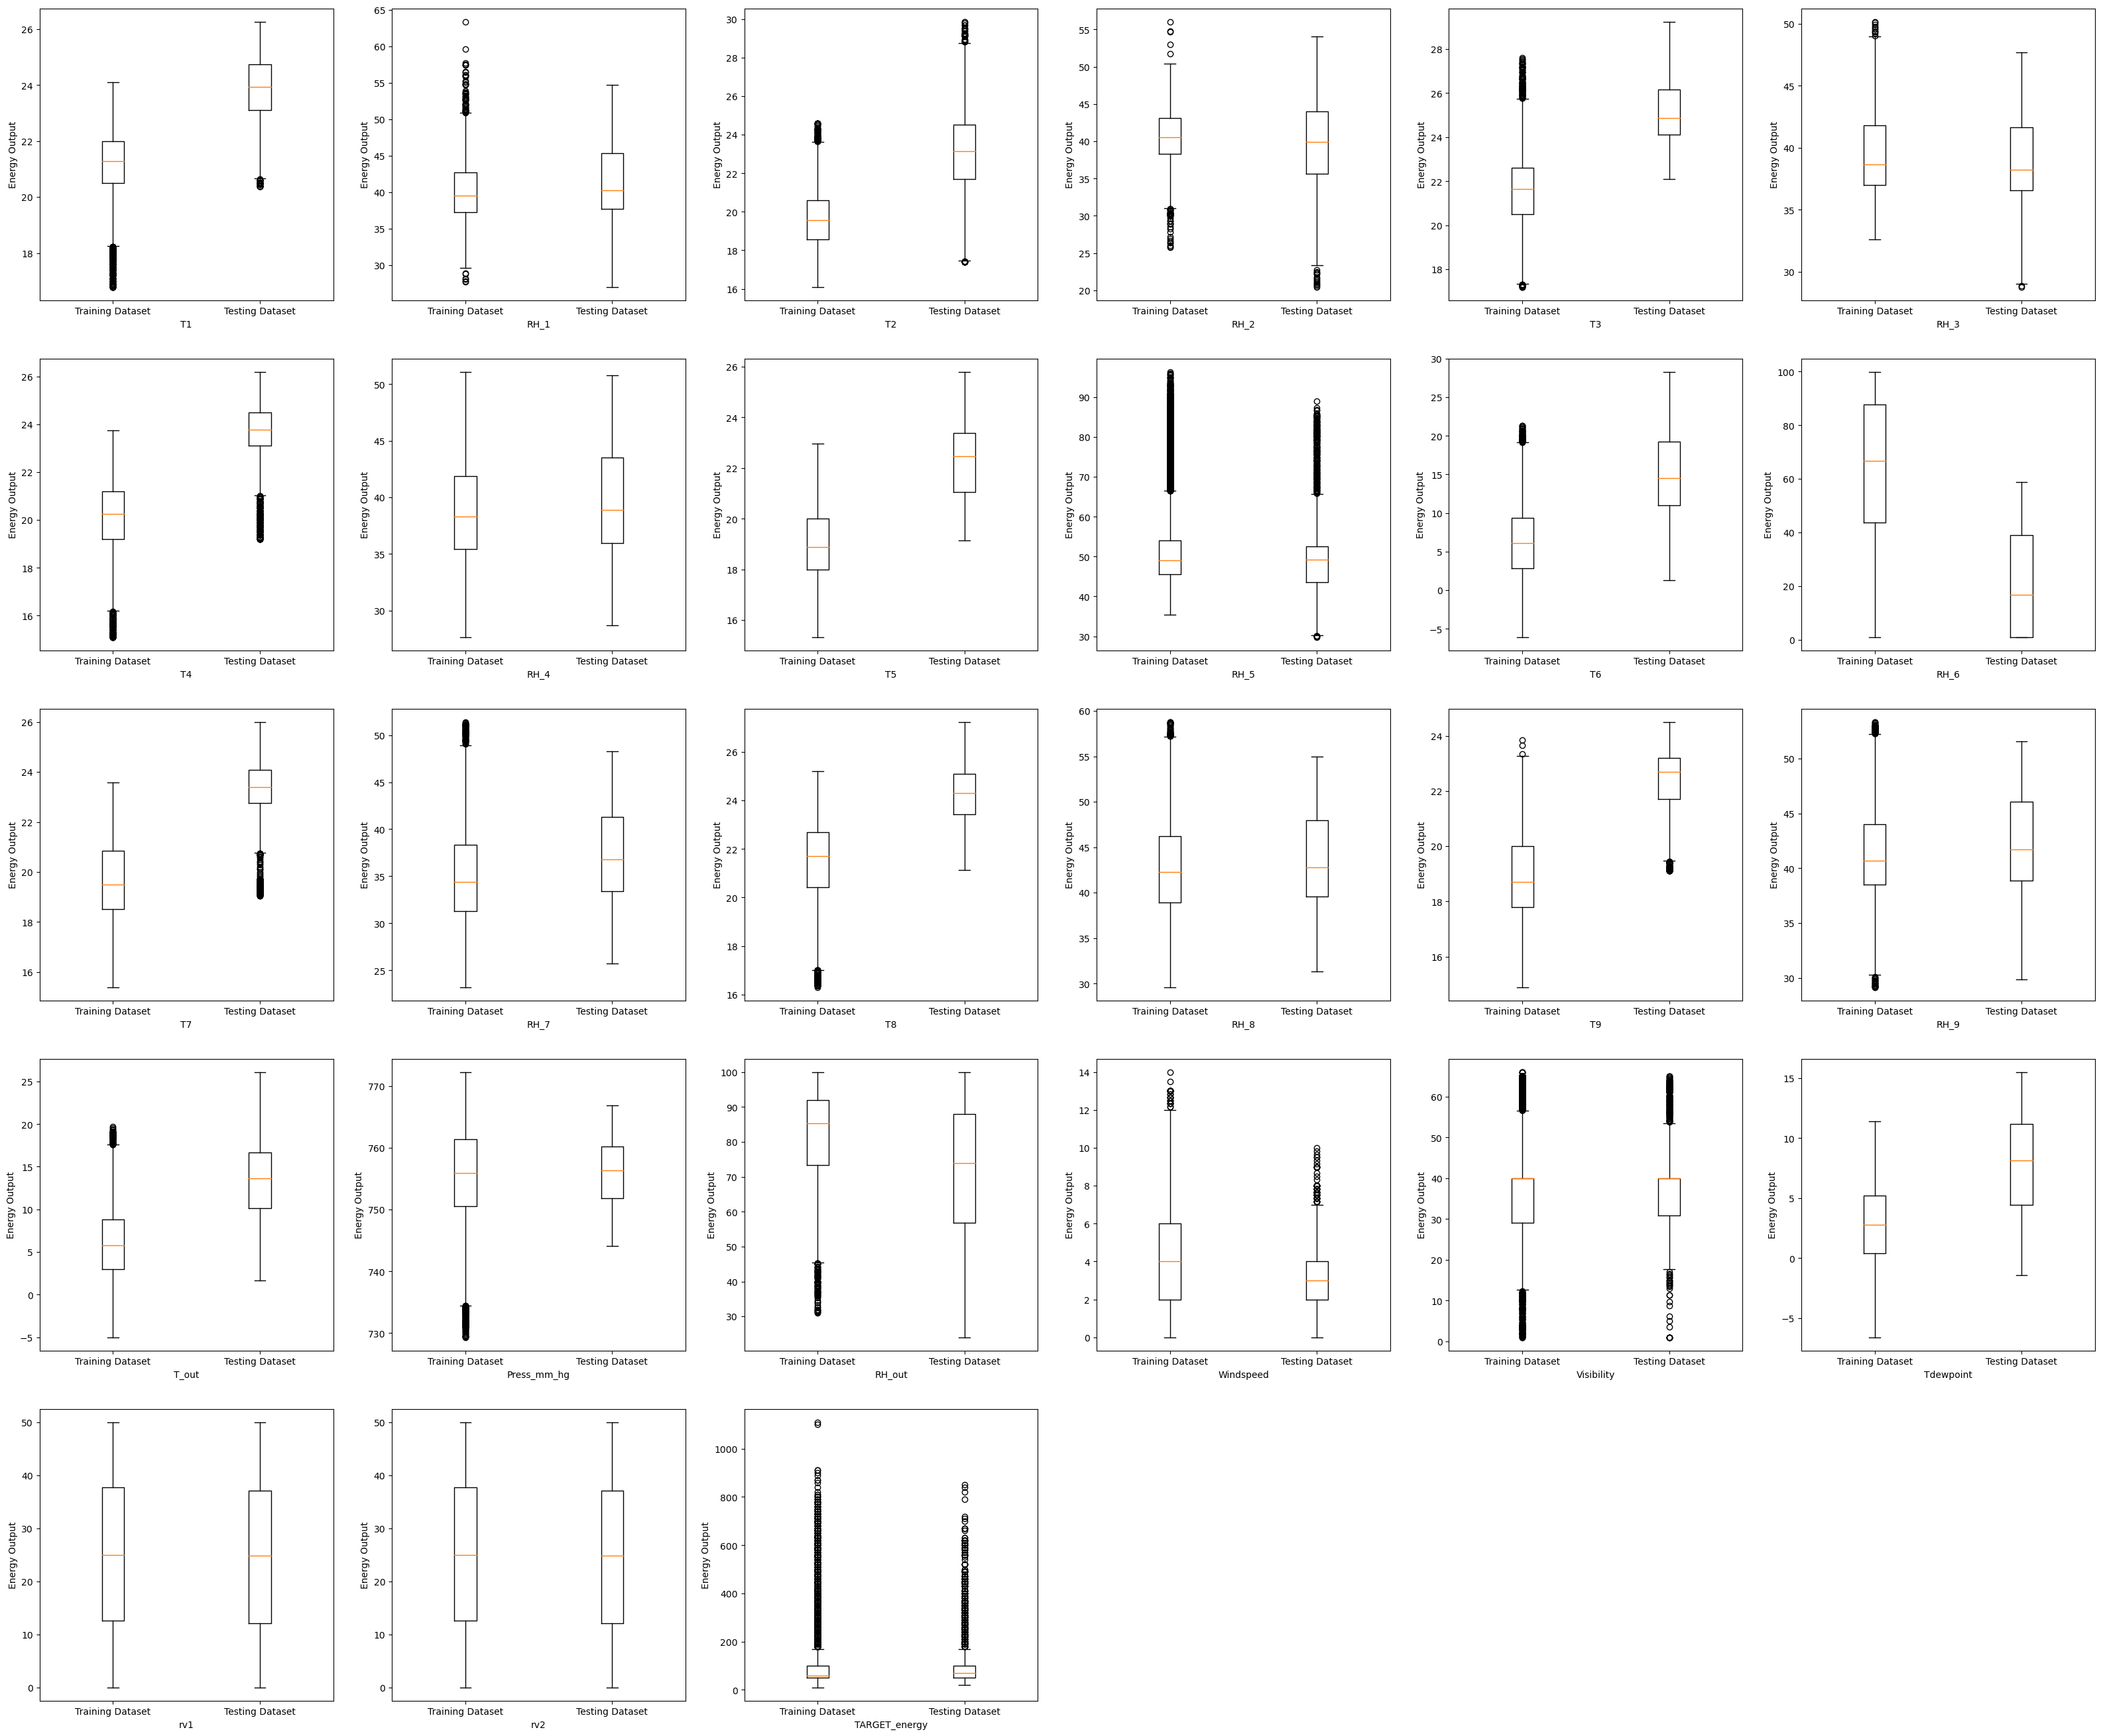

In [7]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Removal of outliers (training dataset)

In [8]:
for i, col in enumerate(df.columns):
   
    q1 = training_data[col].quantile(0.25)
    q3 = training_data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    training_data = training_data[(training_data[col] < upper_bound) & (training_data[col] > lower_bound)]

#### Removal of outliers (testing dataset)

In [9]:
for i, col in enumerate(df.columns):
   
    q1 = testing_data[col].quantile(0.25)
    q3 = testing_data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    testing_data = testing_data[(testing_data[col] < upper_bound) & (testing_data[col] > lower_bound)]

#### Checking to see if outliers have been removed.

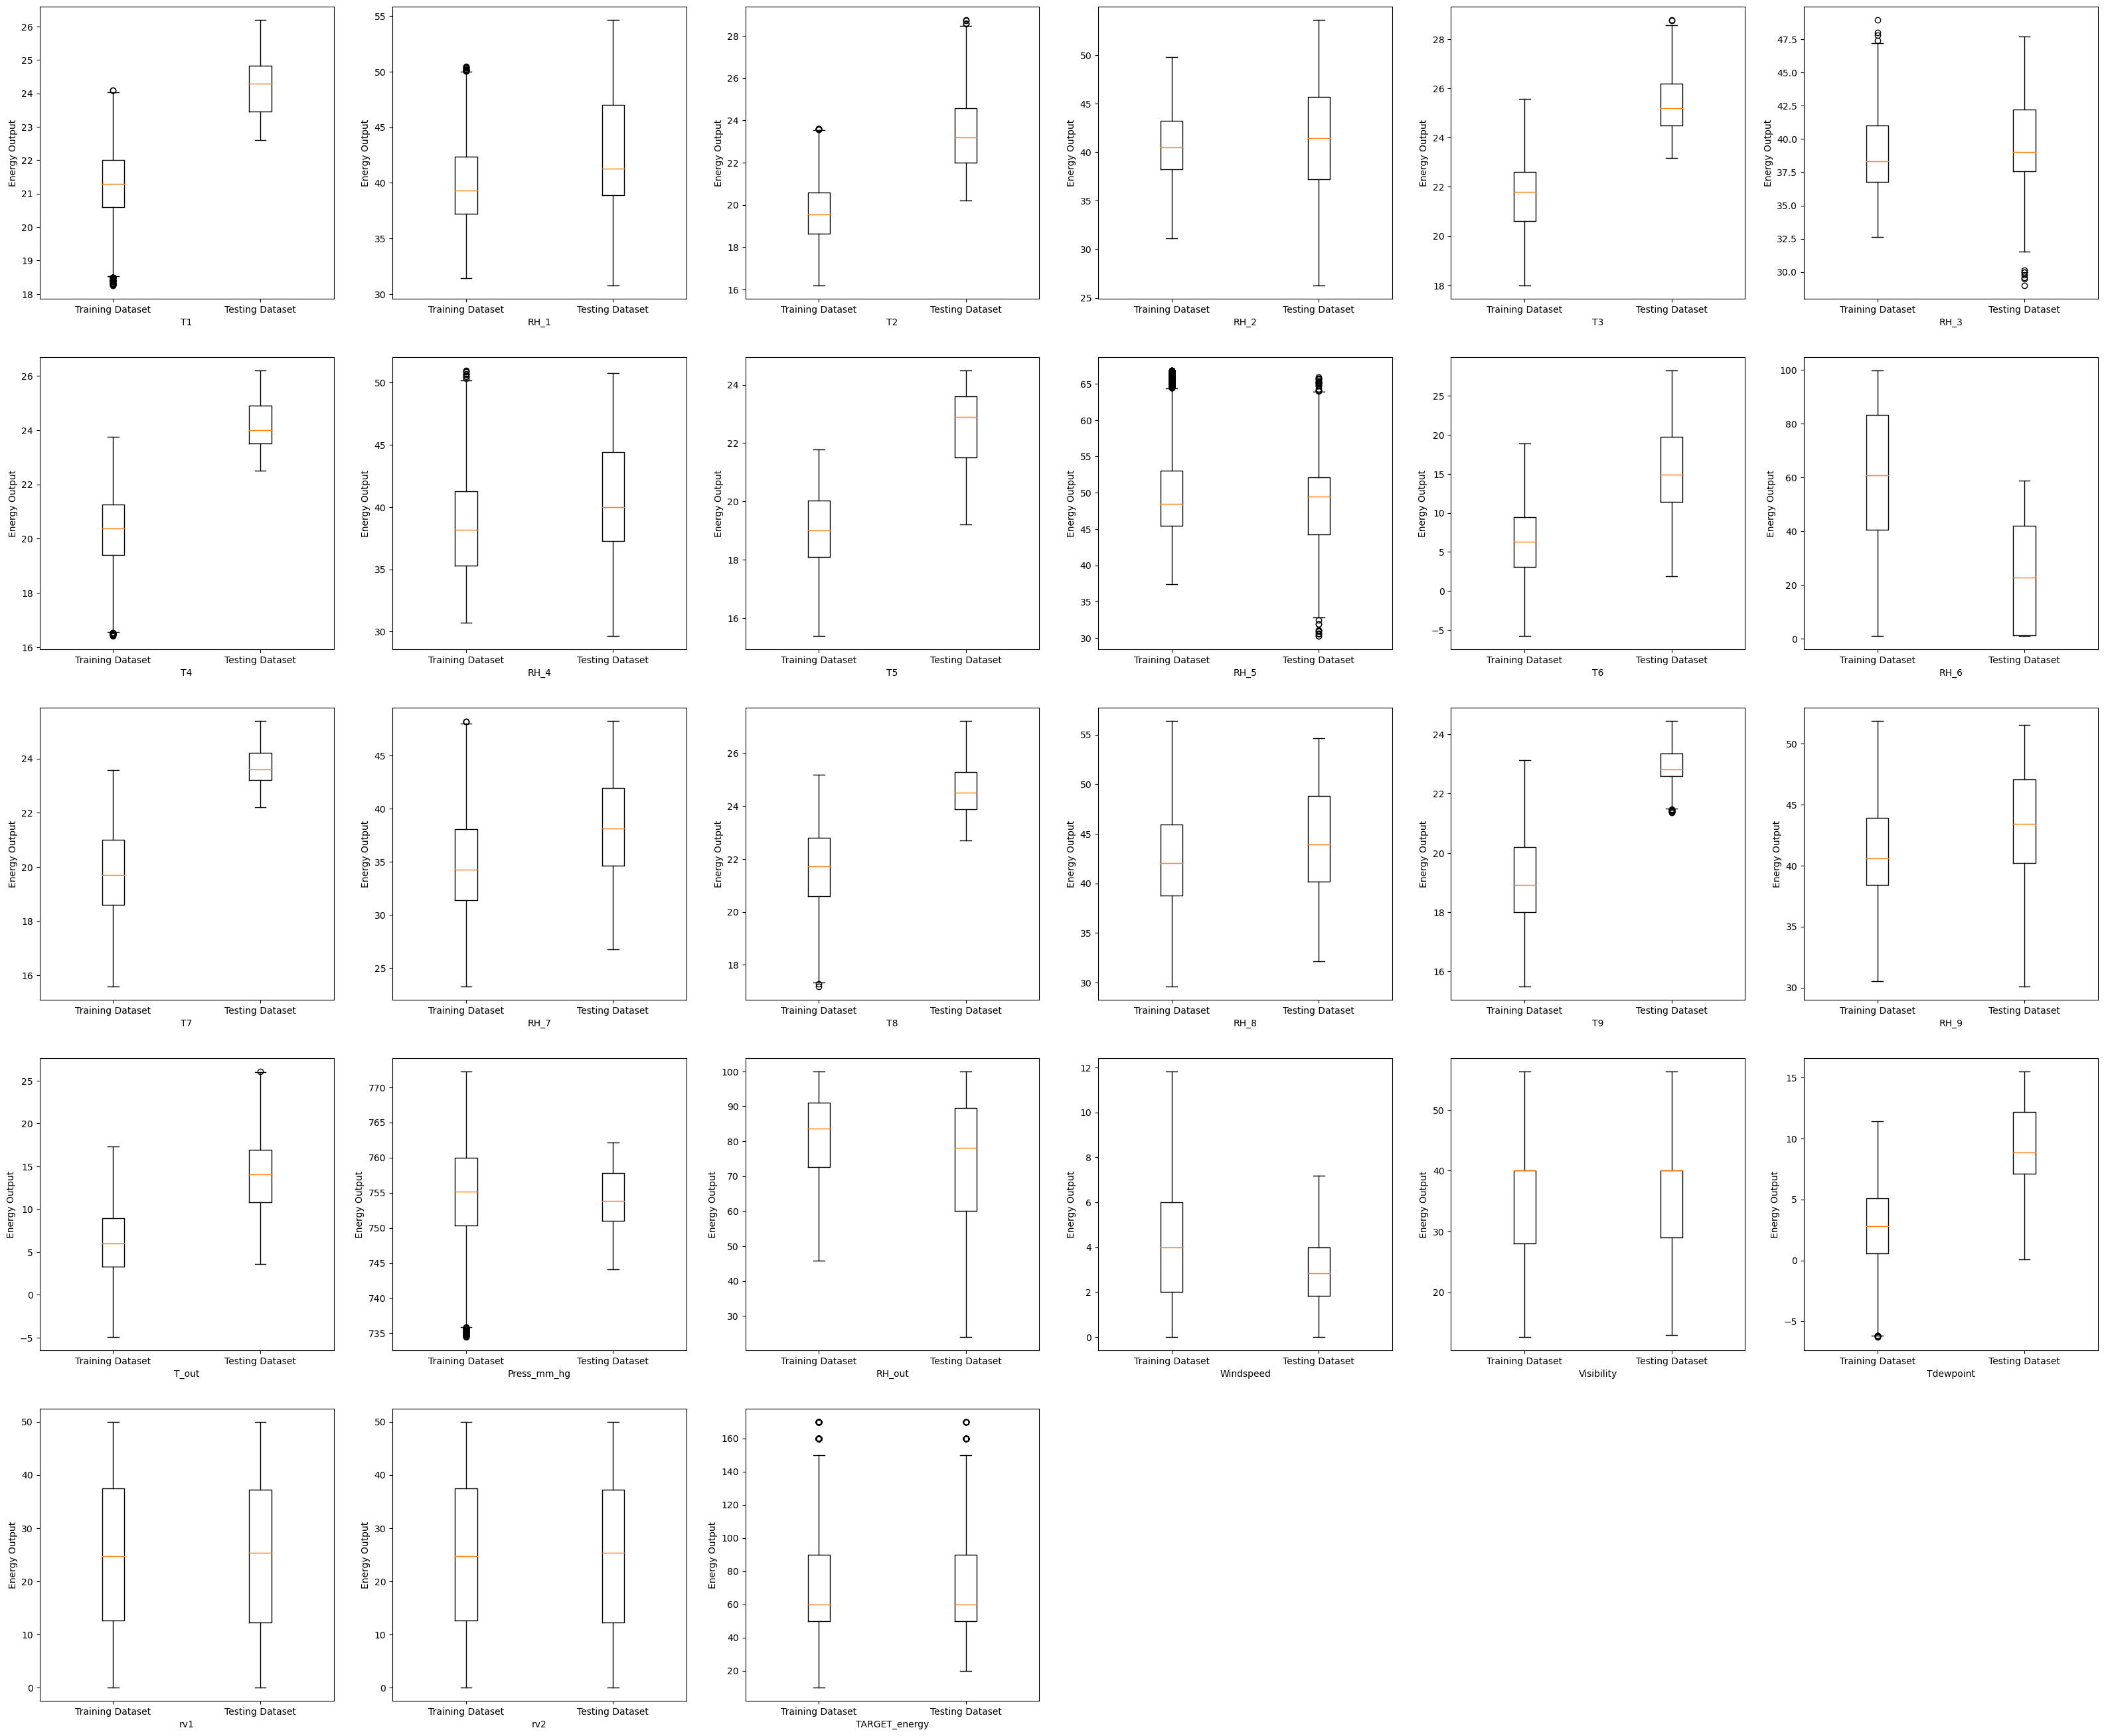

In [10]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(training_data[col], positions = [0])
    plt.boxplot(testing_data[col], positions = [1])
    plt.xticks([0,1],['Training Dataset', 'Testing Dataset'])
    plt.xlabel(col)
    plt.ylabel('Energy Output')
plt.show()

#### Checking for duplicates

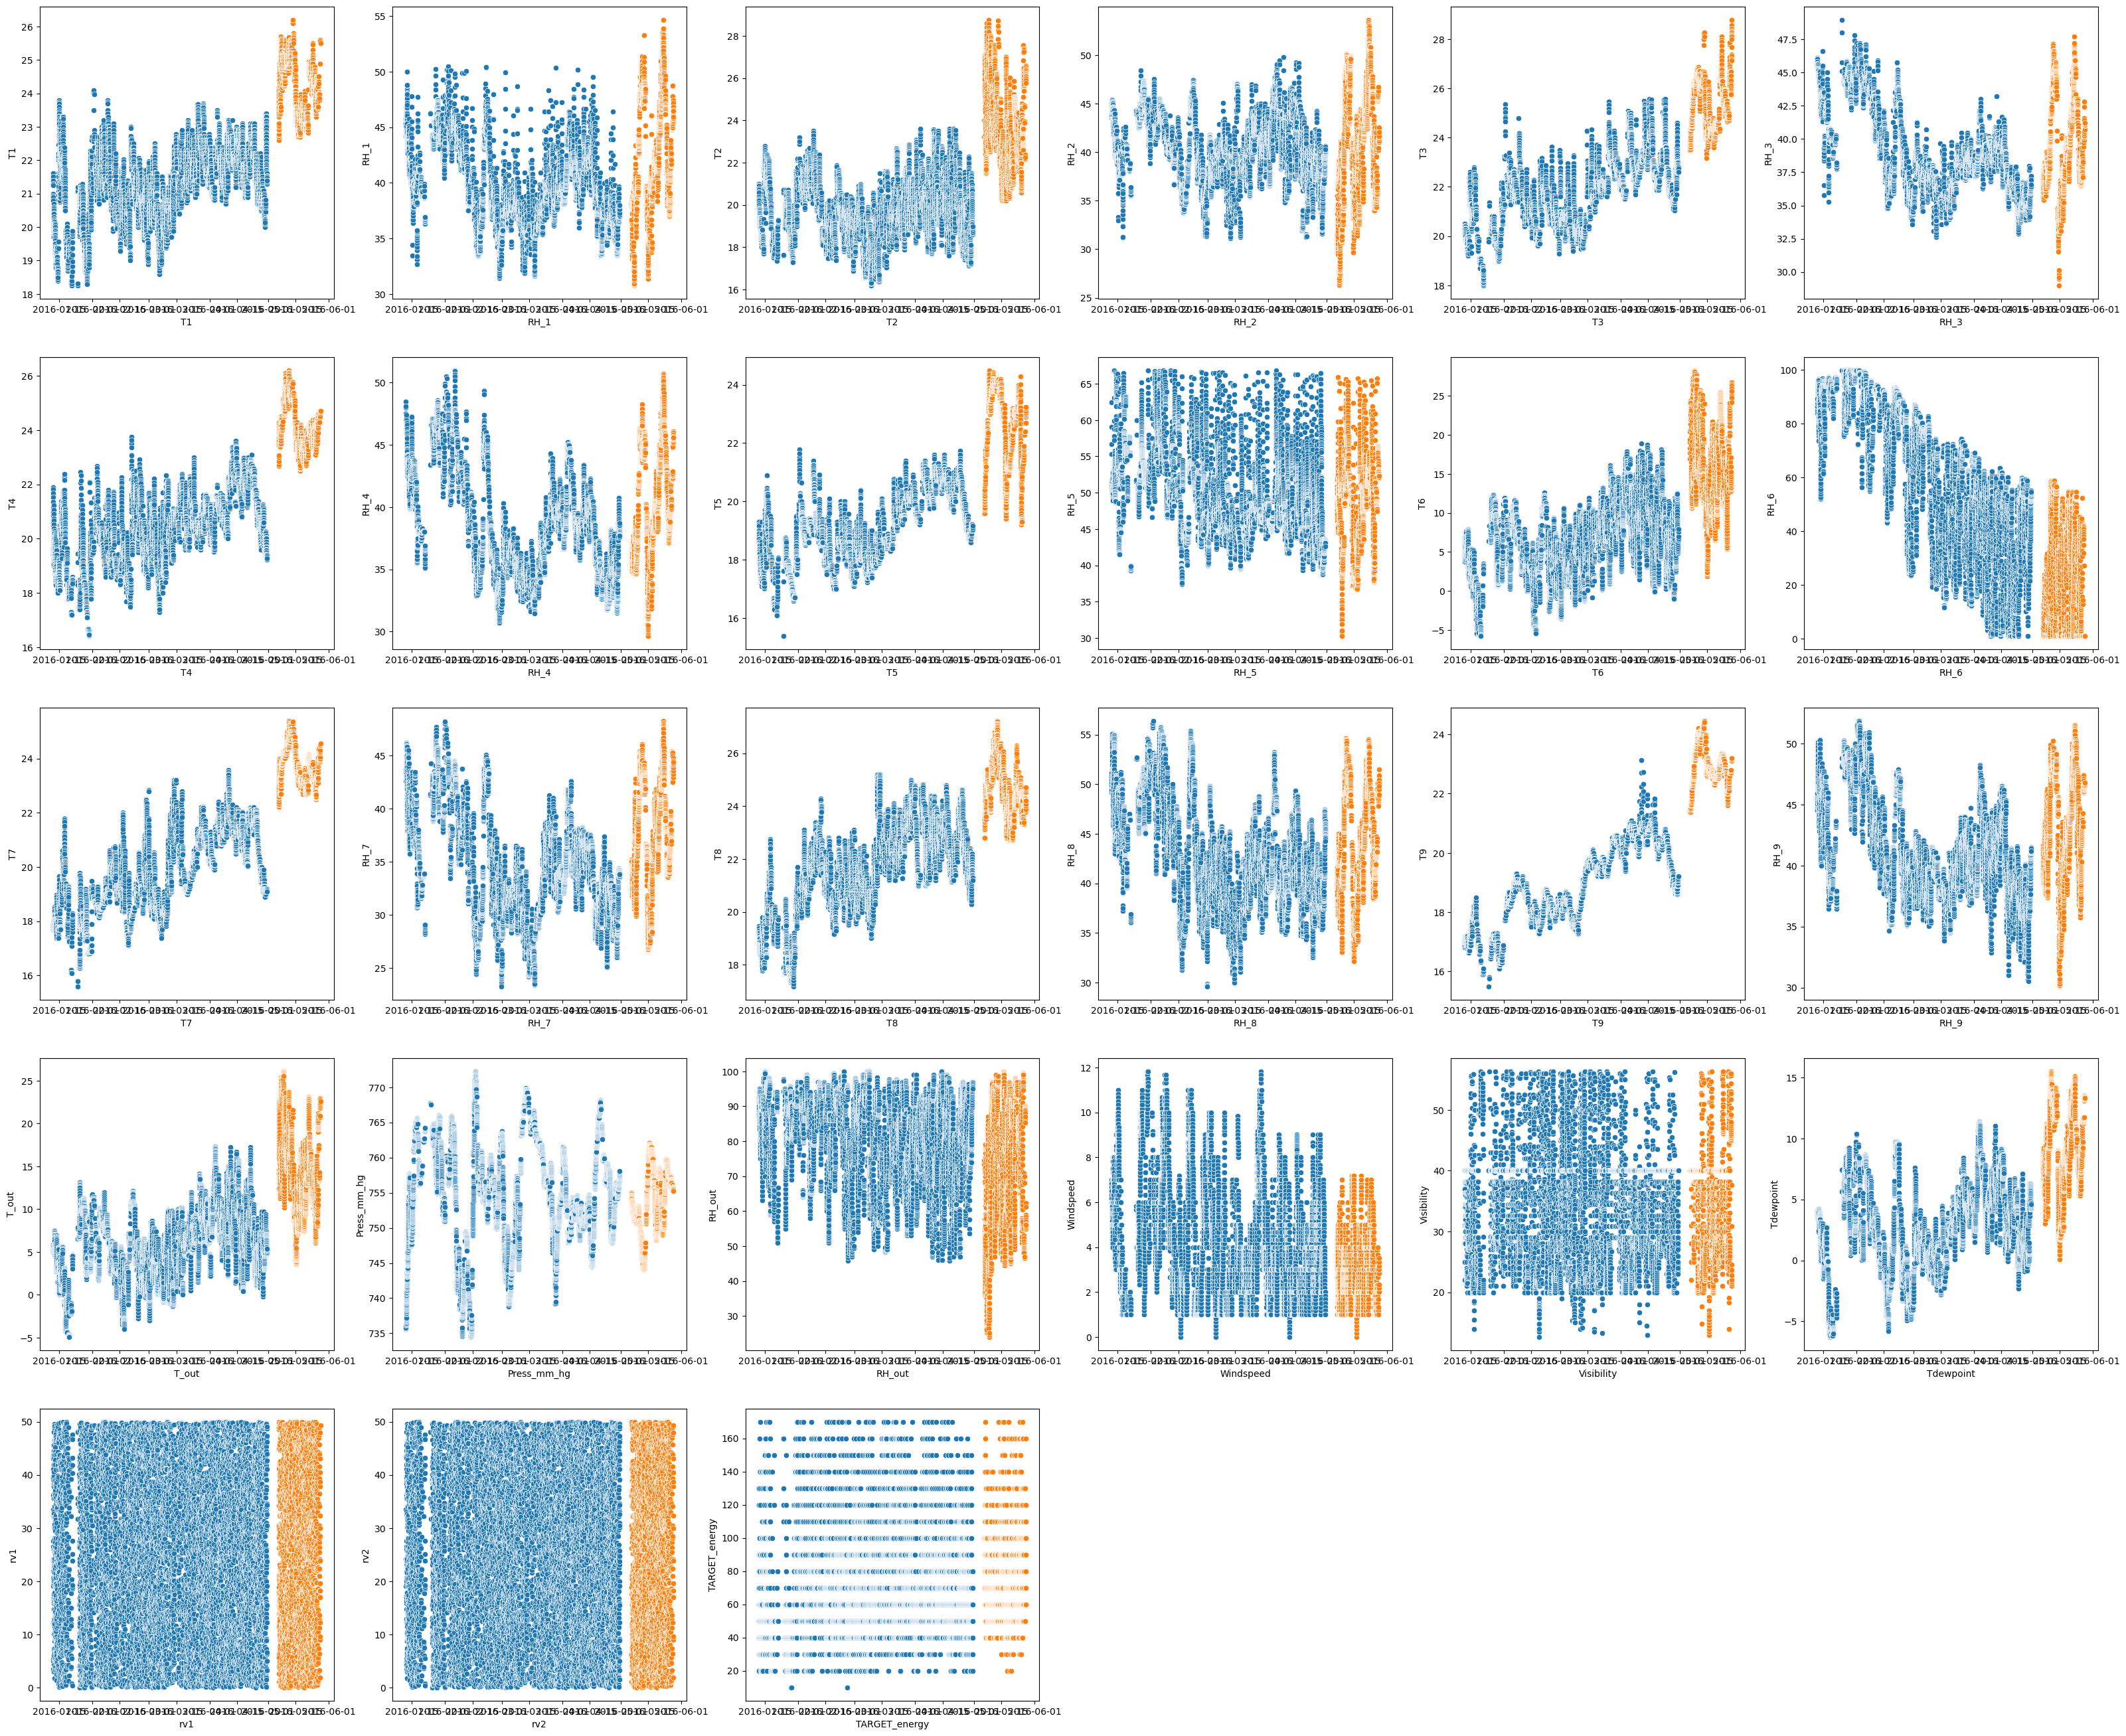

In [11]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    sns.scatterplot(data = training_data, x = training_data.index, y = training_data[col])
    sns.scatterplot(data = testing_data, x = testing_data.index, y = testing_data[col])
    plt.xlabel(col)
plt.show()

#### Feature scaling (training + testing dataset)

In [12]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

columns = df.columns[0:26]

scaler = StandardScaler()
transformer = PowerTransformer()

training_data[columns] = transformer.fit_transform(training_data[columns])
training_data[columns] = scaler.fit_transform(training_data[columns])

testing_data[columns] = transformer.transform(testing_data[columns])
testing_data[columns] = scaler.transform(testing_data[columns])


#### Histograms

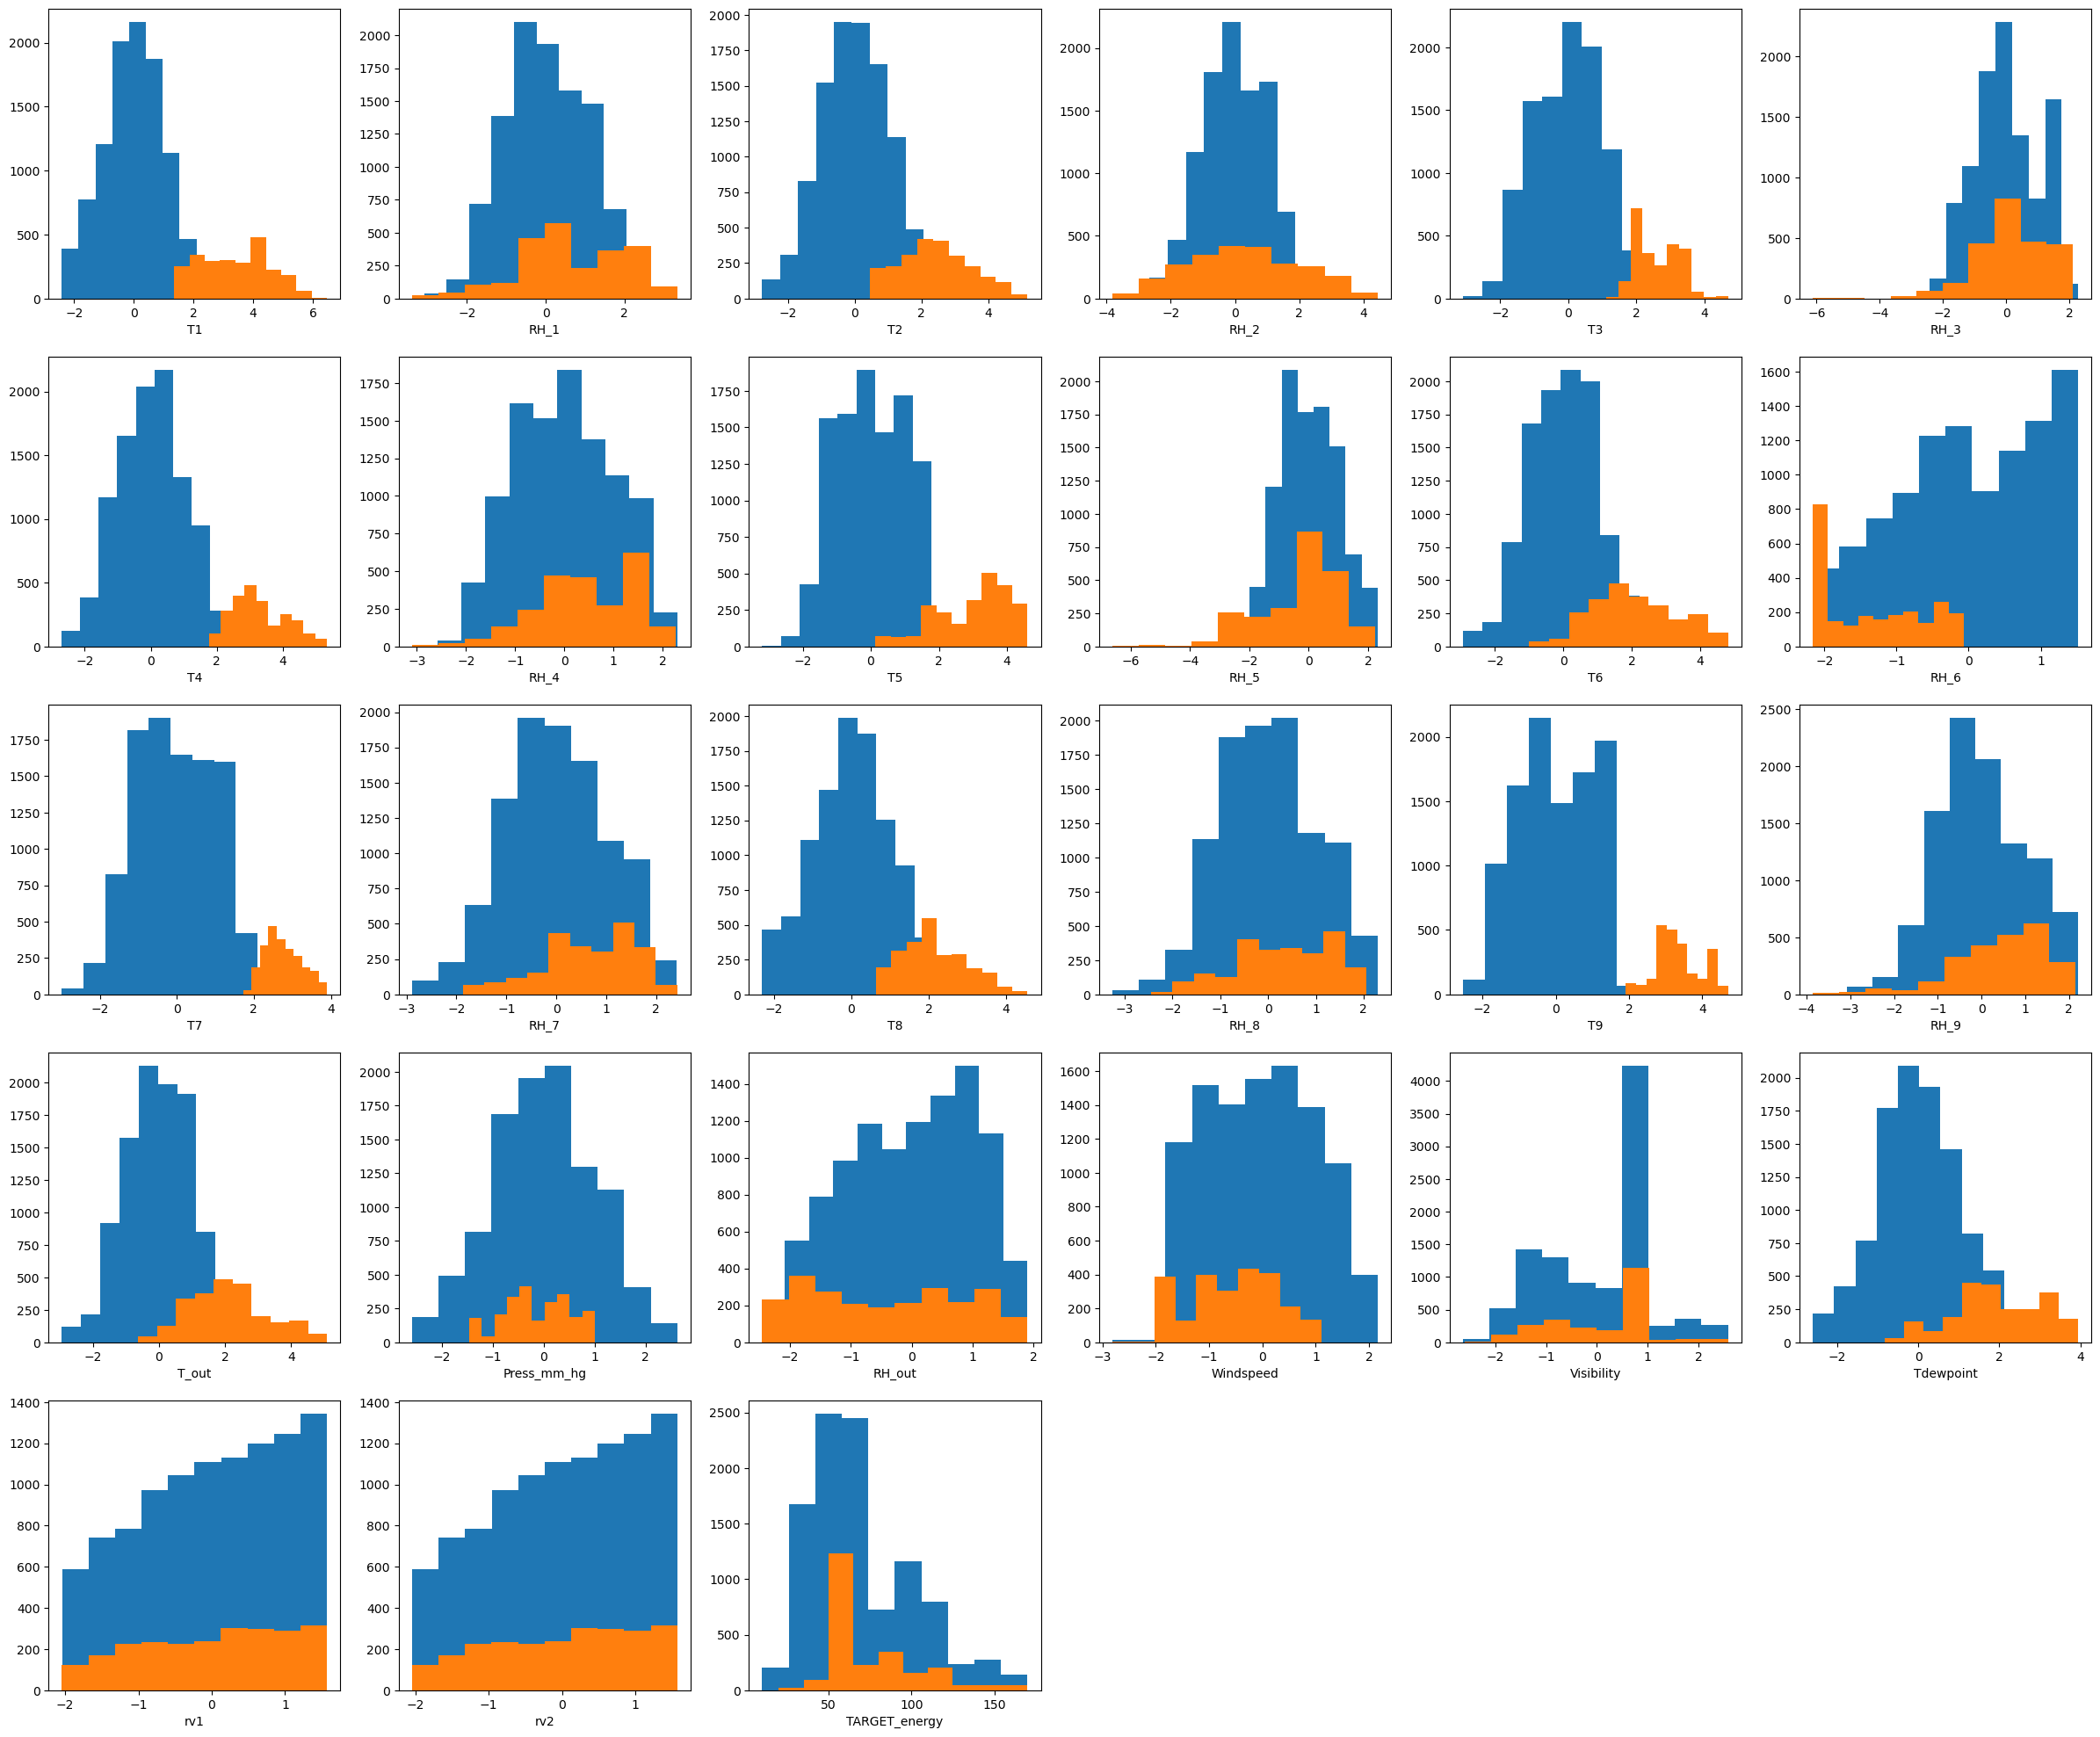

In [13]:
plt.figure(figsize=(30,30))
for i, col in enumerate(testing_data.columns):
    plt.subplot(6,6,i+1)  
    plt.hist(training_data[col])
    plt.hist(testing_data[col])
    plt.xlabel(col)
plt.show()

#### Plot of Energy Against Time

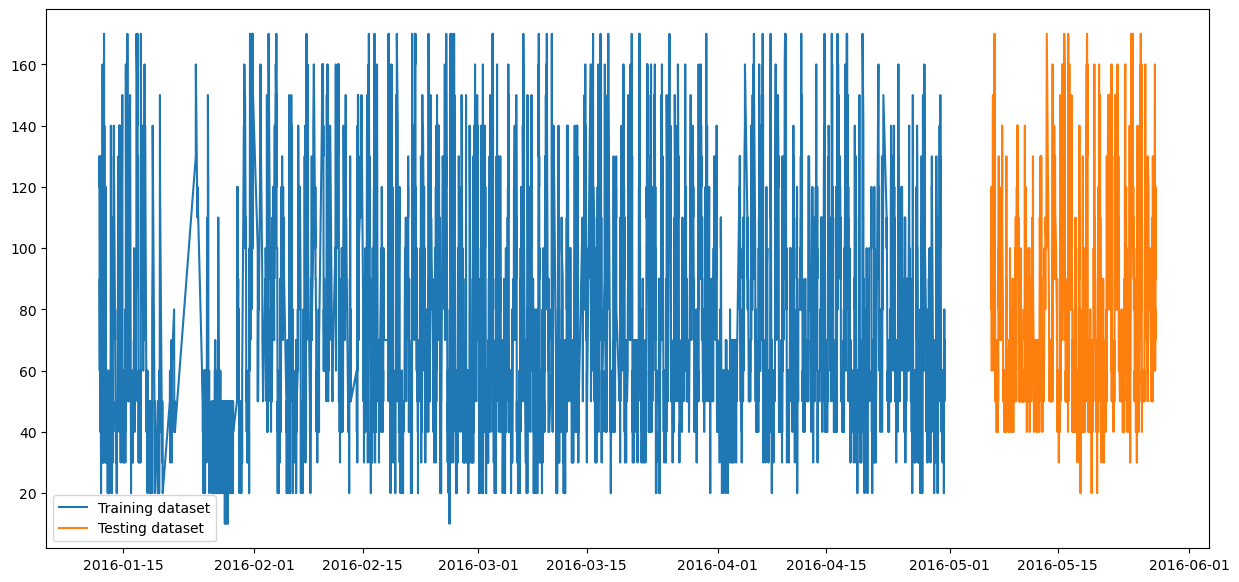

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(training_data.index,training_data['TARGET_energy'])
plt.plot(testing_data.index,testing_data['TARGET_energy'])
plt.legend(['Training dataset', 'Testing dataset'])
plt.show()

In [15]:
print(f"Number of nulls in training dataset: {training_data.isnull().sum().sum()}")
print(f"Number of nulls in testing dataset:  {testing_data.isnull().sum().sum()}")

Number of nulls in training dataset: 0
Number of nulls in testing dataset:  0


#### Heatmap of whole dataset (display of correlation table)

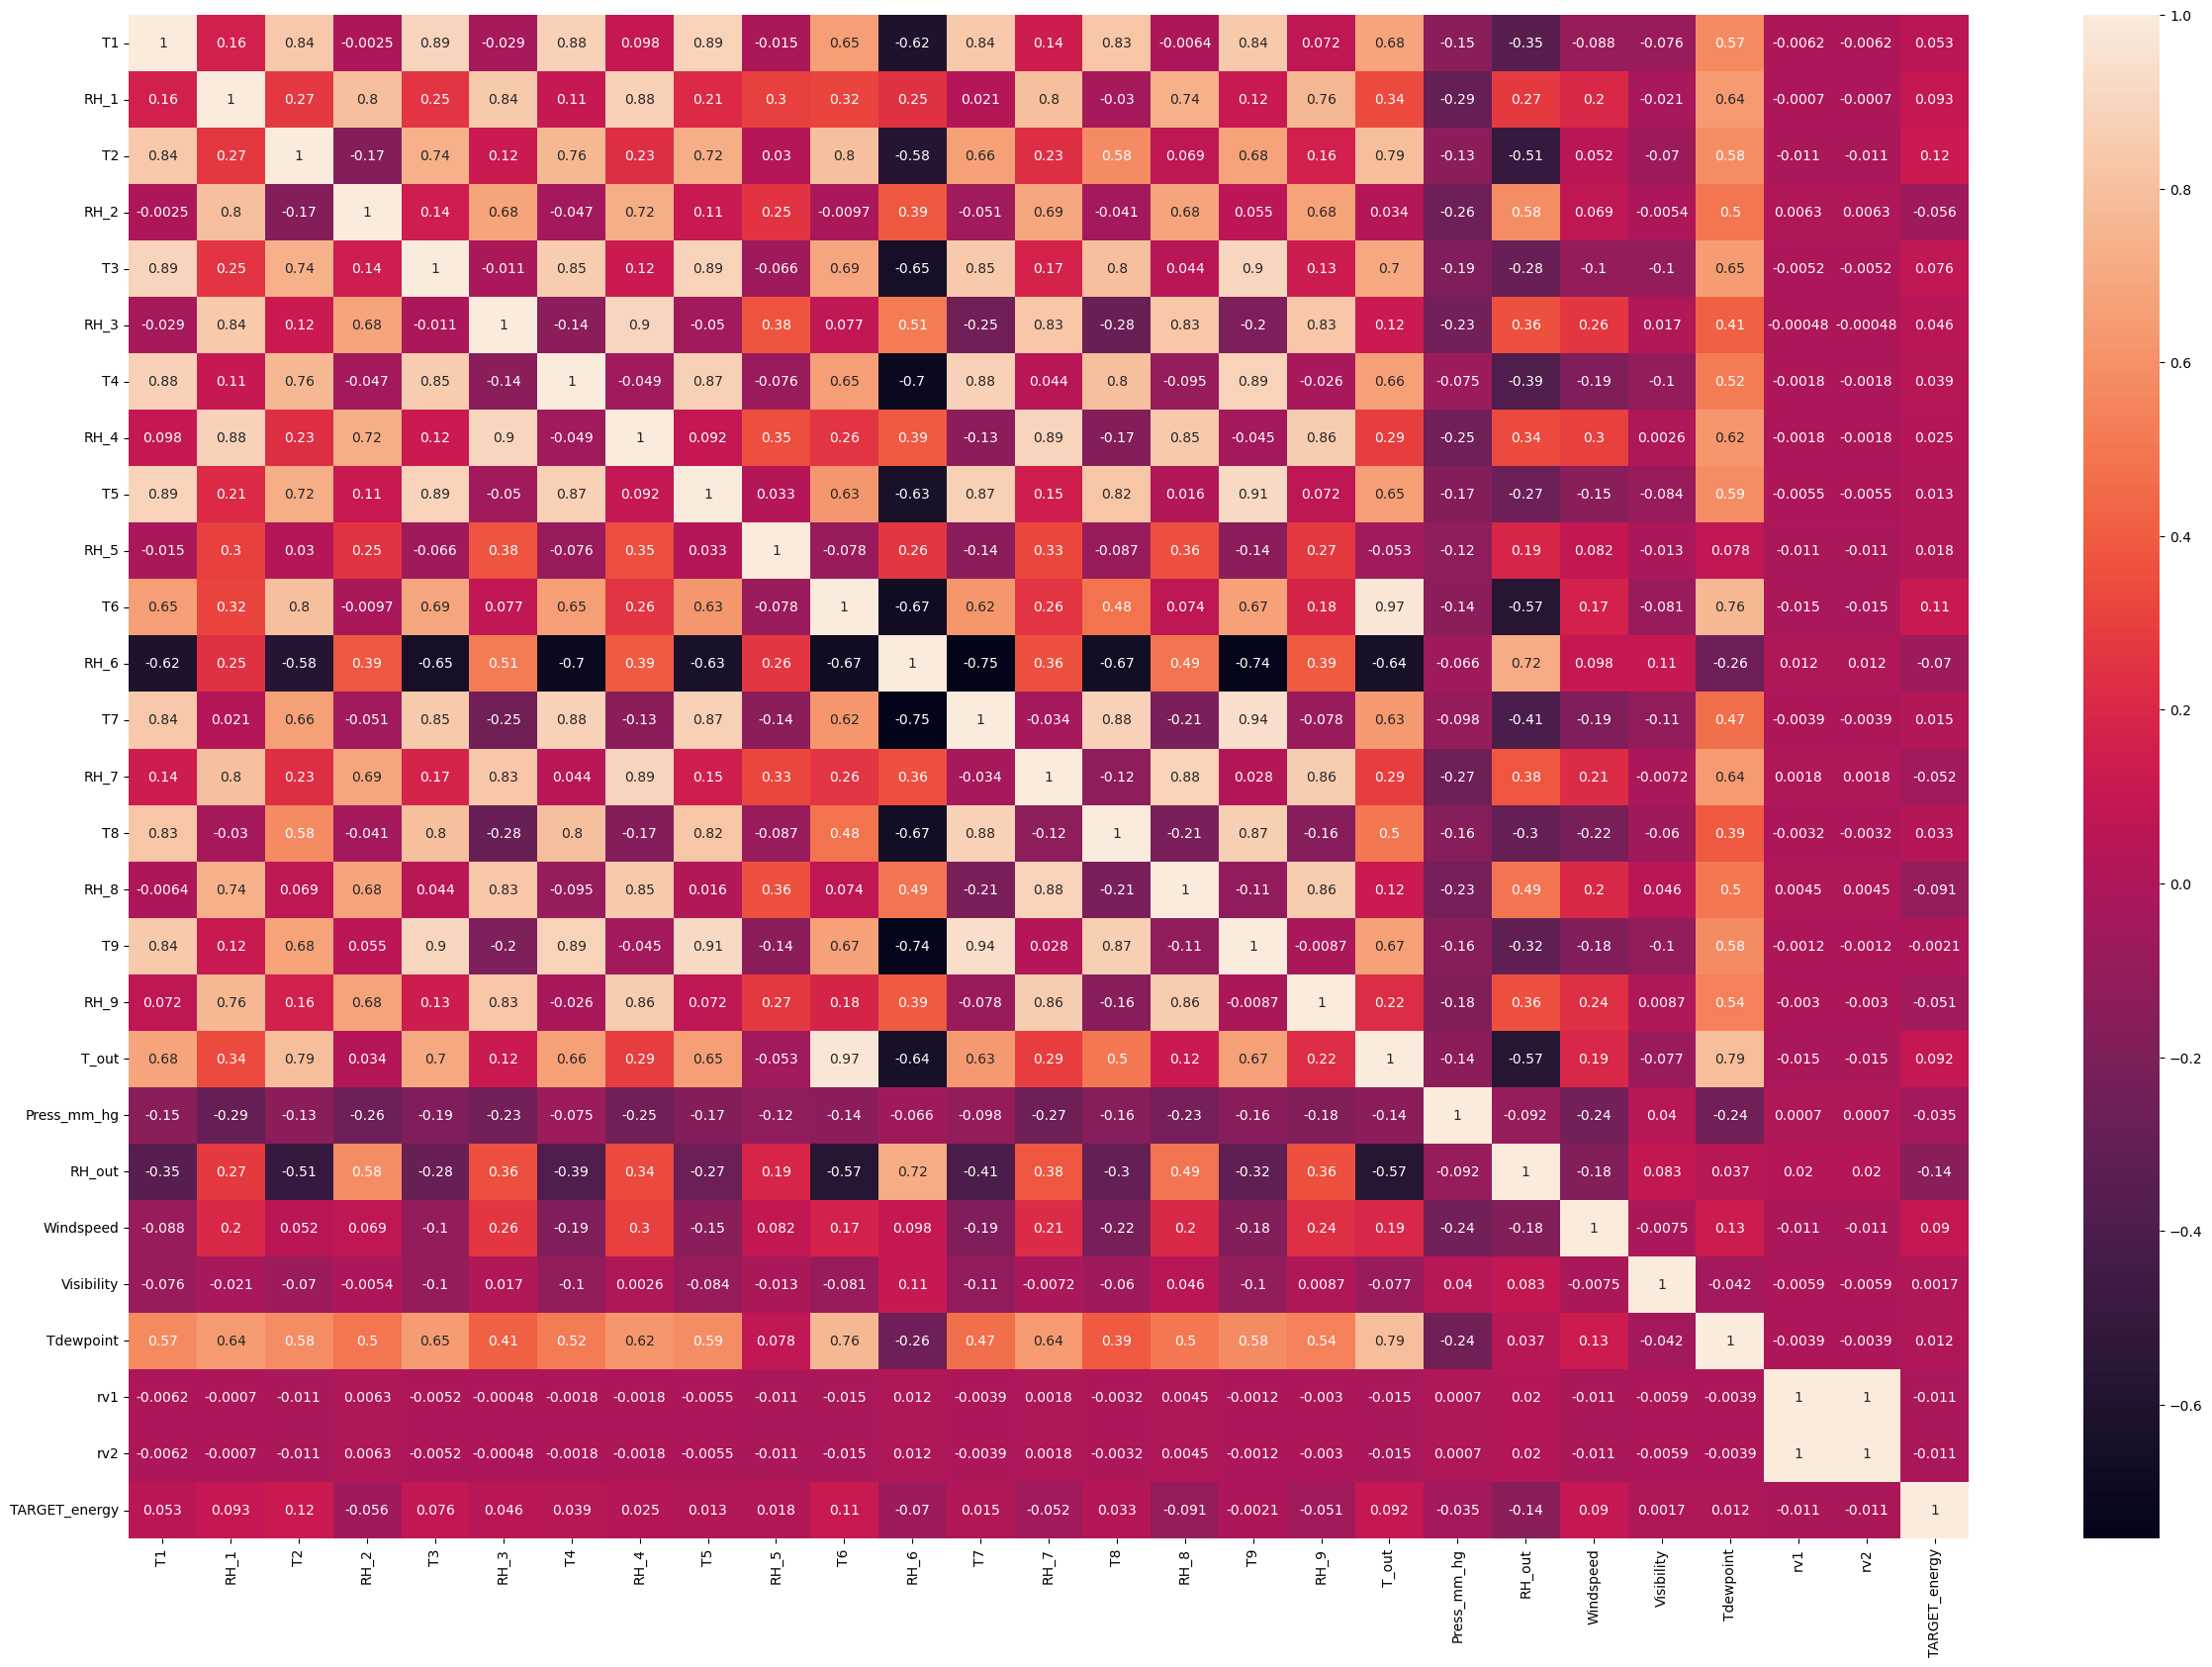

In [16]:
plt.figure(figsize=(30,20))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

In [17]:
print(training_data.dtypes)
print(testing_data.dtypes)

T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7         

In [18]:
print(f"Target feature info (training set):\n{training_data['TARGET_energy'].describe()}\n") 
print(f"Target feature info (testing set):\n{testing_data['TARGET_energy'].describe()}")

Target feature info (training set):
count    10153.000000
mean        68.888998
std         30.568020
min         10.000000
25%         50.000000
50%         60.000000
75%         90.000000
max        170.000000
Name: TARGET_energy, dtype: float64

Target feature info (testing set):
count    2412.000000
mean       72.674129
std        27.314867
min        20.000000
25%        50.000000
50%        60.000000
75%        90.000000
max       170.000000
Name: TARGET_energy, dtype: float64


# Part 2: Non Neural Algorithm

## Modelling using XGBoost

In [19]:
training_set, validation_set = train_test_split(training_data, test_size=0.2, shuffle=False)

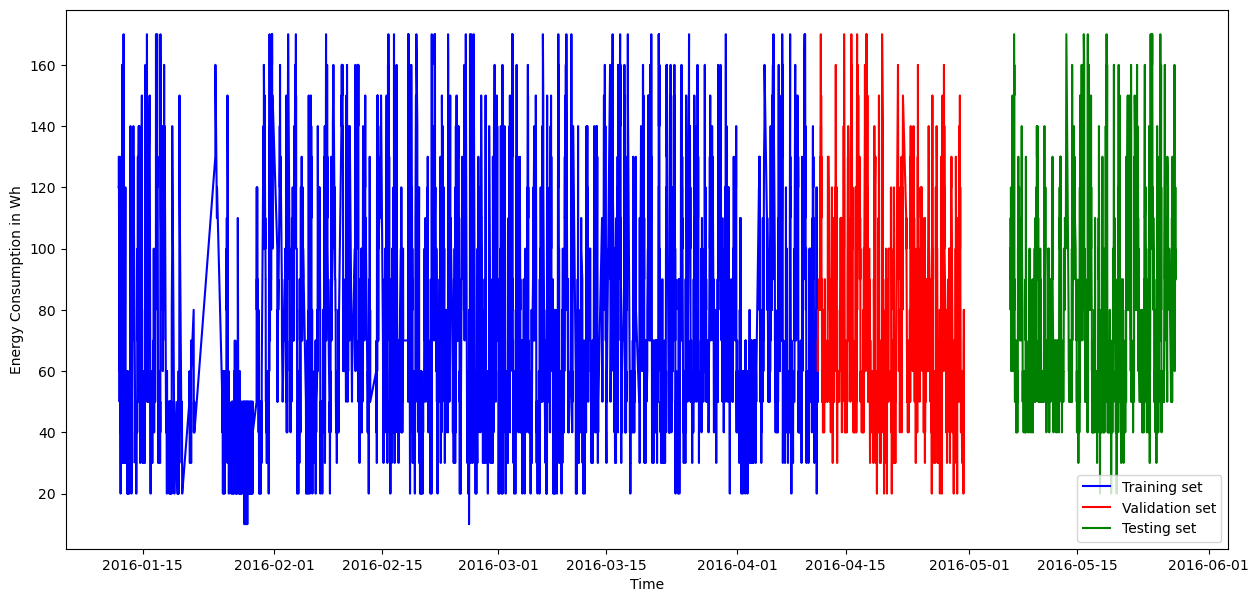

In [20]:
plt.figure(figsize=(15, 7))

plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set', color='blue')
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(testing_data.index,testing_data['TARGET_energy'], color='green')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend(["Training set","Validation set","Testing set"])
plt.show()

In [21]:
! pip install xgboost
import xgboost as xgb

In [22]:
X_train, y_train = training_set.drop(columns=['TARGET_energy']), training_set['TARGET_energy']
X_test, y_test = validation_set.drop(columns=['TARGET_energy']), validation_set['TARGET_energy']

In [23]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
import math

mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

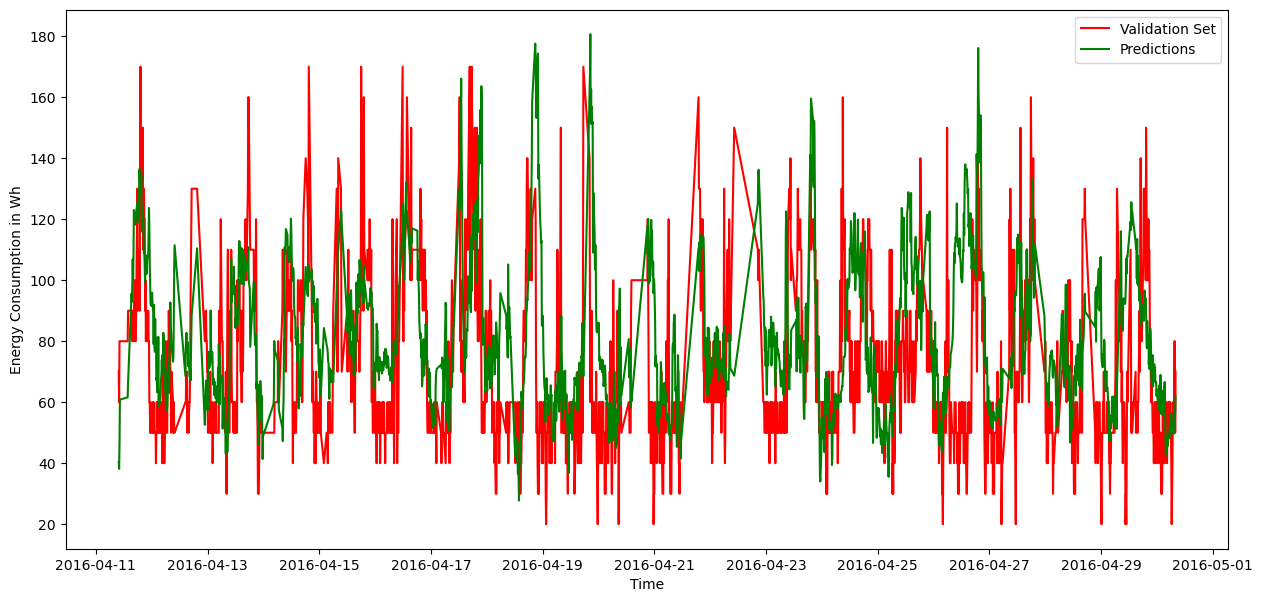

In [26]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color='red')
plt.plot(validation_set.index, testing_predictions, color='green', label='Predictions')
plt.xlabel('Time')
plt.ylabel("Energy Consumption in Wh")
plt.legend()
plt.show()

In [27]:
print(f"RMSE for training (non - neural): {rmse_training}")
print(f"MSE for training (non - neural): {mse_training}\n")

print(f"RMSE for testing (neural): {rmse_testing}")
print(f"MSE for testing (neural): {mse_testing}")

RMSE for training (non - neural): 8.572147465301786
MSE for training (non - neural): 73.48171216687983

RMSE for testing (neural): 30.26204195087139
MSE for testing (neural): 915.7911830362999


### Part 2B: Refinements

# Part 3: Neural Supervised Algorithm

### Part 3A: Base Neural Alogrithm

In [28]:
import tensorflow as tf

In [29]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Designed Neural Model

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(26,1)),
    tf.keras.layers.Dense(1)
])

2024-05-19 16:22:01.289453: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:22:01.289865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:22:01.290575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

#### Neural Network Information

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


#### Compiling

In [32]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

#### Fitting onto the data

In [33]:
model.fit(X_train, y_train, epochs=50,verbose=0)

2024-05-19 16:22:01.340809: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-19 16:22:01.433246: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:22:01.433775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:22:01.434218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

#### Predictions made

In [34]:
training_predictions = model.predict(X_train)
testing_predictions = model.predict(X_test)

 79/254 [========>.....................] - ETA: 0s

2024-05-19 16:22:57.185670: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:22:57.186253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:22:57.186888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 1ms/step


In [35]:
mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)

mse_testing = mean_squared_error(testing_predictions,y_test)
rmse_testing = math.sqrt(mse_testing)

In [36]:
print(training_predictions.shape)
print(X_train.shape)

(8122, 1)
(8122, 26)


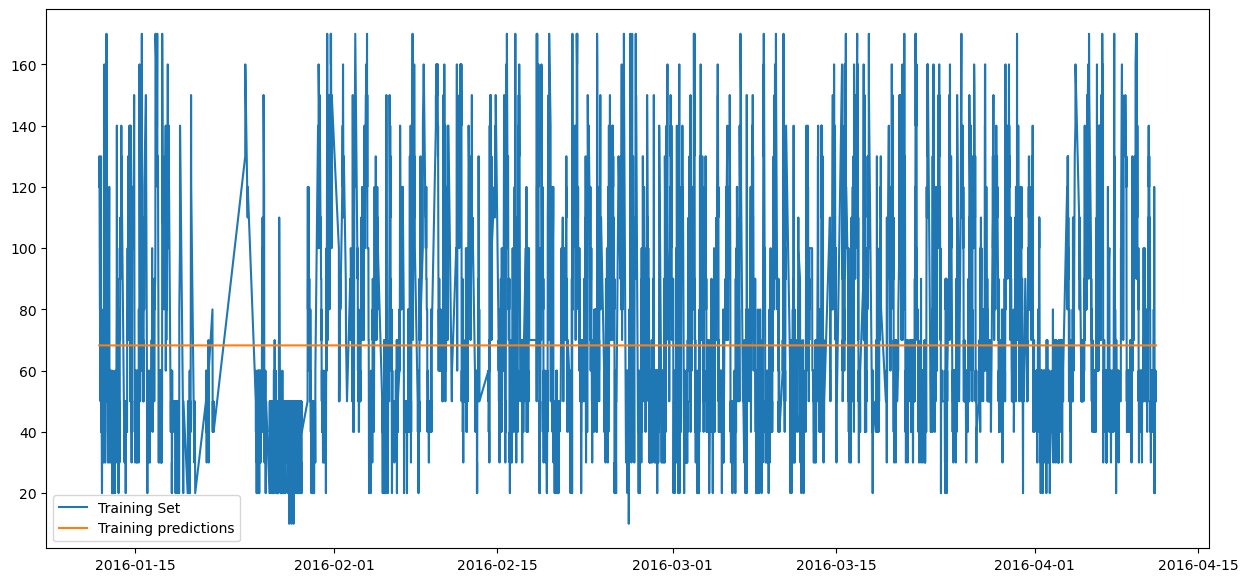

In [37]:
plt.figure(figsize=(15, 7))
plt.plot(training_set.index, training_set['TARGET_energy'], label='Training Set',)
plt.plot(training_set.index, training_predictions, label='Training predictions')
plt.legend()

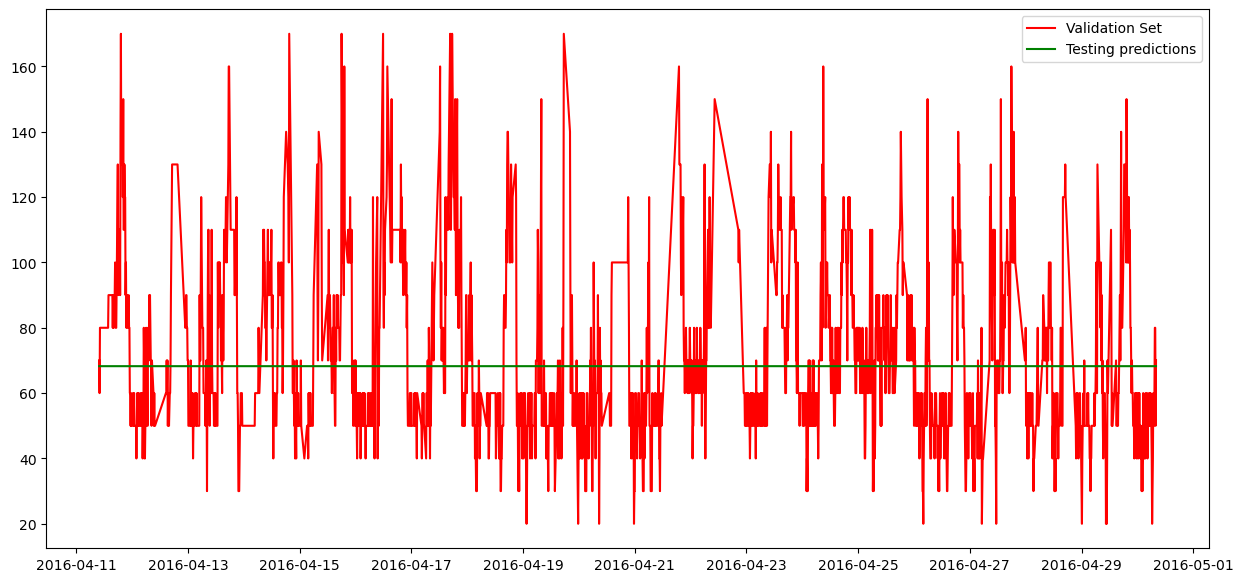

In [38]:
plt.figure(figsize=(15, 7))
plt.plot(validation_set.index, validation_set['TARGET_energy'], label='Validation Set', color = 'red')
plt.plot(validation_set.index, testing_predictions, label='Testing predictions', color = 'green')
plt.legend()
plt.show()

In [39]:
print(f"RMSE for training (neural): {rmse_training}")
print(f"MSE for training (neural): {mse_training}\n")

print(f"RMSE for testing (neural): {rmse_testing}")
print(f"MSE for testing (neural): {mse_testing}")

RMSE for training (neural): 31.59309307924621
MSE for training (neural): 998.1235303139148

RMSE for testing (neural): 26.099640198031796
MSE for testing (neural): 681.1912184667171


### Part 3B: Refinements

#### Checking the ideal amount of neurons

In [40]:
neurons = [1,2,4,8,16,32,64,128,256,512]
scores = []

In [41]:
for i in range(len(neurons)):
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(neurons[i], input_shape=(26,1)),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.fit(X_train, y_train, epochs=30,verbose=0)
    
    training_predictions = model.predict(X_train)
    testing_predictions = model.predict(X_test)
    
    mse_training = mean_squared_error(training_predictions, y_train)
    rmse_training = math.sqrt(mse_training)

    mse_testing = mean_squared_error(testing_predictions,y_test)
    rmse_testing = math.sqrt(mse_testing)
    
    scores.append([neurons[i], mse_training,rmse_training,mse_testing,rmse_testing])
    

2024-05-19 16:22:58.080913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:22:58.081373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:22:58.081881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

152/254 [================>.............] - ETA: 0s

2024-05-19 16:23:17.573775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:17.574235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:17.574781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 650us/step


2024-05-19 16:23:17.951102: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:17.951526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:17.951915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

156/254 [=================>............] - ETA: 0s

2024-05-19 16:23:37.747269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:37.747875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:37.748511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 654us/step


2024-05-19 16:23:38.125637: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:38.126051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:38.126436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

154/254 [=================>............] - ETA: 0s

2024-05-19 16:23:58.045540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:58.046004: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:58.046477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 699us/step


2024-05-19 16:23:58.433032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:23:58.433784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:23:58.434313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

149/254 [================>.............] - ETA: 0s

2024-05-19 16:24:18.707917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:24:18.708370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:24:18.708826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 686us/step


2024-05-19 16:24:19.092081: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:24:19.092504: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:24:19.092890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

137/254 [===============>..............] - ETA: 0s

2024-05-19 16:24:40.620009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:24:40.620462: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:24:40.620895: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 743us/step


2024-05-19 16:24:41.036795: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:24:41.037333: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:24:41.037829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

119/254 [=============>................] - ETA: 0s

2024-05-19 16:25:05.342112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:25:05.342575: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:25:05.343001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 903us/step


2024-05-19 16:25:05.792719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:25:05.793135: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:25:05.793664: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 80/254 [========>.....................] - ETA: 0s

2024-05-19 16:25:39.240912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:25:39.241372: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:25:39.241980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 1ms/step


2024-05-19 16:25:39.825238: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:25:39.825671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:25:39.826134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 36/254 [===>..........................] - ETA: 0s

2024-05-19 16:26:51.499140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:26:51.499598: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:26:51.500157: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 3ms/step


2024-05-19 16:26:52.603128: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:26:52.603582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:26:52.603958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 17/254 [=>............................] - ETA: 1s

2024-05-19 16:29:16.147824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:29:16.148296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:29:16.148767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 0s 7ms/step


2024-05-19 16:29:18.517570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:29:18.518353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:29:18.519124: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

  4/254 [..............................] - ETA: 4s 

2024-05-19 16:36:18.843523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-19 16:36:18.844031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-19 16:36:18.844673: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

64/64 [==============================] - 1s 20ms/step


In [42]:
scores = pd.DataFrame(scores, columns = ['Number of neurons', 'MSE training','RMSE training','MSE testing','RMSE testing'])

In [43]:
scores

Number of neurons  MSE training  RMSE training  MSE testing  RMSE testing
0                  1   3735.697883      61.120356  3558.587074     59.653894
1                  2   3104.101539      55.714464  2909.682713     53.941475
2                  4   1971.033478      44.396323  1737.053464     41.677973
3                  8   1063.501817      32.611376   767.350308     27.701089
4                 16    997.990530      31.590988   680.267104     26.081931
5                 32    998.001411      31.591160   679.707670     26.071204
6                 64    998.027894      31.591579   679.527369     26.067746
7                128    999.127398      31.608977   678.312750     26.044438
8                256    998.053922      31.591991   679.400384     26.065310
9                512    612.055538      24.739756   699.741470     26.452627

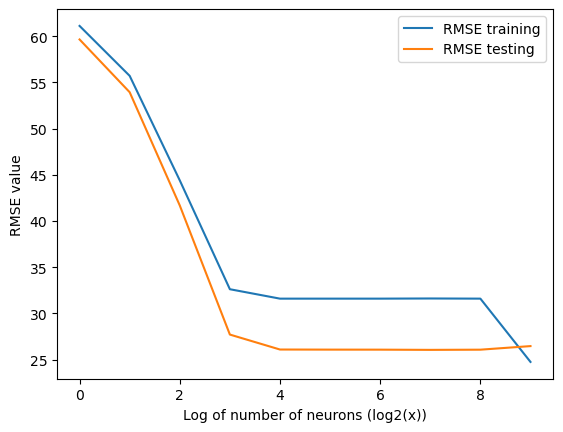

In [44]:
plt.plot(scores.index, scores['RMSE training'], label='RMSE training')
plt.plot(scores.index, scores['RMSE testing'], label='RMSE testing')
plt.xlabel('Log of number of neurons (log2(x))')
plt.ylabel('RMSE value')
plt.legend()
plt.show()

#### Neuron set to __ (efficency + simplicity considered)

## Finding the right Activation Function

In [45]:
activation_functions = ['relu', 'linear','selu','elu','leaky_relu']


scores = []

for i in range(0,len(activation_functions)): 
    for j in range(0,len(activation_functions)):
        model = tf.keras.Sequential([
                tf.keras.layers.LSTM(16, input_shape=(26,1), activation=activation_functions[i]),
                tf.keras.layers.Dense(1, activation = activation_functions[j])
            ])

        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        model.fit(X_train, y_train, epochs=30,verbose = 0)

        training_predictions = model.predict(X_train)
        testing_predictions = model.predict(X_test)

        mse_training = mean_squared_error(training_predictions, y_train)
        rmse_training = math.sqrt(mse_training)
        mse_testing = mean_squared_error(testing_predictions,y_test)
        rmse_testing = math.sqrt(mse_testing)

        scores.append([activation_functions[i],activation_functions[j],mse_training,rmse_training,mse_testing,rmse_testing])
    

64/64 [==============================] - 0s 806us/step


In [46]:
scores = pd.DataFrame(scores, columns=['Activation function type (LSTM)', 'Activation function type (Dense)','MSE training', 'RMSE training', 'MSE testing', 'RMSE testing'])

In [47]:
scores

Activation function type (LSTM) Activation function type (Dense)  \
0                             relu                             relu   
1                             relu                           linear   
2                             relu                             selu   
3                             relu                              elu   
4                             relu                       leaky_relu   
5                           linear                             relu   
6                           linear                           linear   
7                           linear                             selu   
8                           linear                              elu   
9                           linear                       leaky_relu   
10                            selu                             relu   
11                            selu                           linear   
12                            selu                             selu   
13                            selu                              elu   
14                            selu                       leaky_relu   
15                             elu                             relu   
16                             elu                           linear   
17                             elu                             selu   
18                             elu                              elu   
19                             elu                       leaky_relu   
20                      leaky_relu                             relu   
21                      leaky_relu                           linear   
22                      leaky_relu                             selu   
23                      leaky_relu                              elu   
24                      leaky_relu                       leaky_relu   

    MSE training  RMSE training  MSE testing  RMSE testing  
0     722.284152      26.875345   604.788714     24.592452  
1     727.408017      26.970503   642.237216     25.342400  
2     790.989388      28.124534   594.423852     24.380809  
3     742.881240      27.255848   572.227047     23.921268  
4     743.102835      27.259913   646.947996     25.435172  
5     812.680592      28.507553   675.717881     25.994574  
6     748.302037      27.355110   561.264255     23.691016  
7     711.805127      26.679676   563.309711     23.734147  
8     785.395875      28.024915   687.019056     26.211048  
9     752.290396      27.427913   610.498883     24.708276  
10    800.770790      28.297894   621.934647     24.938618  
11    711.756719      26.678769   511.284132     22.611593  
12    733.909959      27.090773   534.469996     23.118607  
13    679.573324      26.068627   610.628814     24.710905  
14    794.801772      28.192229   701.924250     26.493853  
15    728.100320      26.983334   602.364551     24.543116  
16    758.261617      27.536551   621.800645     24.935931  
17    745.258769      27.299428   657.681850     25.645309  
18    764.295909      27.645902   644.857942     25.394053  
19    776.421795      27.864346   590.368132     24.297492  
20    763.938062      27.639429   664.533745     25.778552  
21    756.104310      27.497351   607.764087     24.652872  
22    771.918849      27.783428   634.924784     25.197714  
23    764.394359      27.647683   659.095808     25.672861  
24    766.818200      27.691482   674.703879     25.975063

In [48]:
scores.iloc[scores['RMSE testing'].idxmin()]

Activation function type (LSTM)           selu
Activation function type (Dense)        linear
MSE training                        711.756719
RMSE training                        26.678769
MSE testing                         511.284132
RMSE testing                         22.611593
Name: 11, dtype: object

#### ____ and _____  (LSTM + Dense) Best activation function

##  Finding the right number of features 

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

scores = []

for i in range(1, 26):
    featureSelector = SelectKBest(score_func=f_classif, k=i).fit(X_train, y_train)

    TrainX_new = featureSelector.transform(X_train)
    TestX_new = featureSelector.transform(X_test)
    
    model = tf.keras.Sequential([
            tf.keras.layers.LSTM(16, input_shape=(TrainX_new.shape[1], 1), activation='elu'),
            tf.keras.layers.Dense(1, activation='elu')
        ])
    
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    model.fit(TrainX_new, y_train, epochs=30, verbose=0)
    
    training_predictions = model.predict(TrainX_new)
    testing_predictions = model.predict(TestX_new)
    
    mse_training = mean_squared_error(training_predictions, y_train)
    rmse_training = math.sqrt(mse_training)
    mse_testing = mean_squared_error(testing_predictions, y_test)
    rmse_testing = math.sqrt(mse_testing)
    
    scores.append([i, mse_training, rmse_training, mse_testing, rmse_testing])


64/64 [==============================] - 0s 775us/step


In [50]:
scores = pd.DataFrame(scores, columns = ['Number of features', 'MSE training','RMSE training','MSE testing','RMSE testing'])

In [51]:
scores

Number of features  MSE training  RMSE training  MSE testing  RMSE testing
0                    1    896.645963      29.944047   661.801604     25.725505
1                    2    875.217235      29.584071   866.199224     29.431263
2                    3    859.056434      29.309665   655.566499     25.604033
3                    4    820.822127      28.649993   583.292052     24.151440
4                    5    846.602812      29.096440   610.651917     24.711372
5                    6    764.776960      27.654601   572.709033     23.931340
6                    7    750.118051      27.388283   672.330172     25.929330
7                    8    732.601320      27.066609   689.519291     26.258699
8                    9    758.528663      27.541399   616.222854     24.823836
9                   10    759.162447      27.552903   617.816328     24.855911
10                  11    689.873560      26.265444   659.759870     25.685791
11                  12    727.186454      26.966395   747.328255     27.337305
12                  13    727.327833      26.969016   589.933381     24.288544
13                  14    685.353944      26.179266   844.520336     29.060632
14                  15    745.498385      27.303816   609.624371     24.690573
15                  16    605.070374      24.598178   606.818334     24.633683
16                  17    718.855880      26.811488   665.835014     25.803779
17                  18    612.633225      24.751429   528.935789     22.998604
18                  19    622.185719      24.943651   596.224726     24.417713
19                  20    696.439177      26.390134   553.706179     23.530962
20                  21    740.148275      27.205666   663.972630     25.767666
21                  22    709.167147      26.630192   664.068236     25.769521
22                  23    675.425424      25.988948   607.681314     24.651193
23                  24    830.957380      28.826331   674.679531     25.974594
24                  25    800.590243      28.294703   617.721100     24.853996

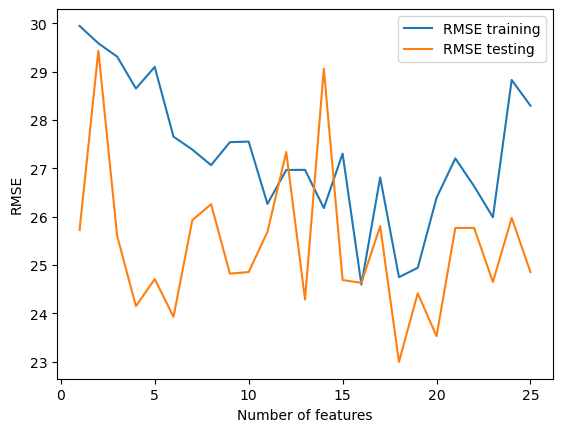

In [52]:
plt.plot(scores['Number of features'], scores['RMSE training'], label='RMSE training')
plt.plot(scores['Number of features'], scores['RMSE testing'], label='RMSE testing')
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [53]:
scores.iloc[scores['RMSE testing'].idxmin()]

Number of features     18.000000
MSE training          612.633225
RMSE training          24.751429
MSE testing           528.935789
RMSE testing           22.998604
Name: 17, dtype: float64

#### Best number of features = __

## Is Regularisation Necessary?

In [54]:
l1_lambda = 0.1
featureSelector = SelectKBest(score_func=f_classif, k=12).fit(X_train, y_train)

TrainX_new = featureSelector.transform(X_train)
TestX_new = featureSelector.transform(X_test)
    
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(16, input_shape=(TrainX_new.shape[1], 1), activation='elu', kernel_regularizer=tf.keras.regularizers.L1(l1_lambda)),
    tf.keras.layers.Dense(1, activation='elu')
])

In [55]:
model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(TrainX_new, y_train, epochs=50,verbose=0)
    
training_predictions = model.predict(TrainX_new)
testing_predictions = model.predict(TestX_new)

64/64 [==============================] - 0s 551us/step


In [56]:
mse_training = mean_squared_error(training_predictions, y_train)
rmse_training = math.sqrt(mse_training)
mse_testing = mean_squared_error(testing_predictions, y_test)
rmse_testing = math.sqrt(mse_testing)

print(f"RMSE for training: {rmse_training}")
print(f"MSE for training: {mse_training}")
print(f"RMSE for testing: {rmse_testing}")
print(f"MSE for testing: {mse_testing}\n")

RMSE for training: 23.916455971536315
MSE for training: 571.9968662384351
RMSE for testing: 31.254655704589194
MSE for testing: 976.8535032124098



#### Regularisation = Y/N (Lambda value = _ )

# Final Judgement